In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.offline import iplot
from sklearn.preprocessing import *
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [3]:
print(df.shape)

(918, 12)


In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T.style.bar(subset=['mean'], color='#E02401').background_gradient(subset=['std'], cmap='coolwarm').background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [9]:
# Extract numerical columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print('There are', len(num_cols), 'numerical features, including:')
print(num_cols, "\n")

# Extract categorical features
cat_cols=df.select_dtypes(object).columns.tolist()
print('There are', len(cat_cols), 'categorical features, including:')
print(cat_cols)

There are 7 numerical features, including:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease'] 

There are 5 categorical features, including:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [10]:
print('There are', len(cat_cols), 'categorical features, including:', "\n", cat_cols, '\n')
# Extract details on categorical features
for i in cat_cols:
    unique_no = df[i].nunique()
    unique_name = df[i].unique().tolist()
    print(i, 'has', unique_no, 'unique variables, including:')
    print(unique_name, "\n")

There are 5 categorical features, including: 
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] 

Sex has 2 unique variables, including:
['M', 'F'] 

ChestPainType has 4 unique variables, including:
['ATA', 'NAP', 'ASY', 'TA'] 

RestingECG has 3 unique variables, including:
['Normal', 'ST', 'LVH'] 

ExerciseAngina has 2 unique variables, including:
['N', 'Y'] 

ST_Slope has 3 unique variables, including:
['Up', 'Flat', 'Down'] 



<AxesSubplot:>

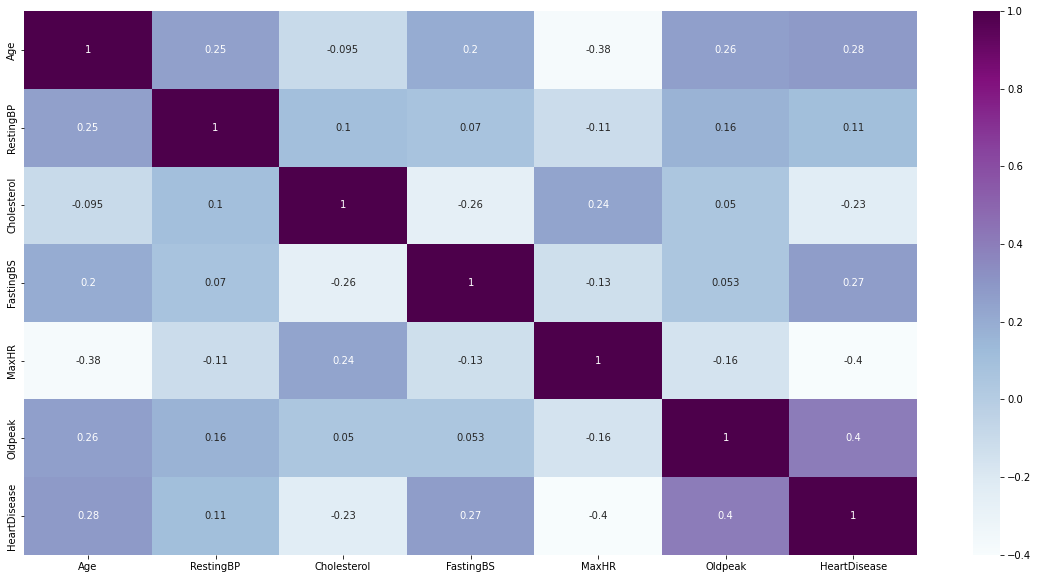

In [11]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

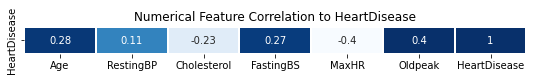

In [12]:
x = df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis = 1) #dropping categorical data 
def corrMat2(df,target='HeartDisease',figsize=(9,0.5),ret_id=False):
    
    corr_mat = df.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, df.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0, 
                     cmap='Blues',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Numerical Feature Correlation to {target}')
    
    if(ret_id):
        return corr
corrMat2(x)

array([<AxesSubplot:title={'center':'F'}>,
       <AxesSubplot:title={'center':'M'}>], dtype=object)

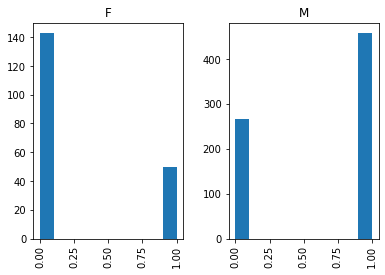

In [13]:
#df.groupby('Sex')['HeartDisease'].iplot(kind='histogram',subplots=True)
df['HeartDisease'].hist(by=df['Sex'])

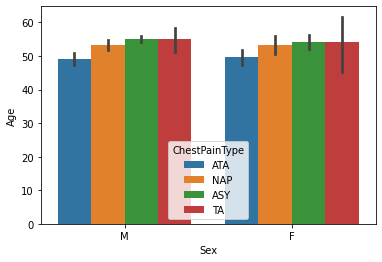

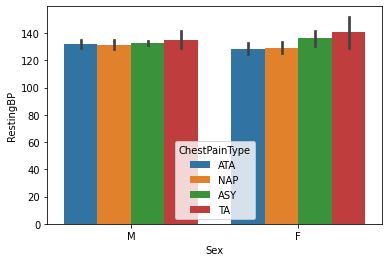

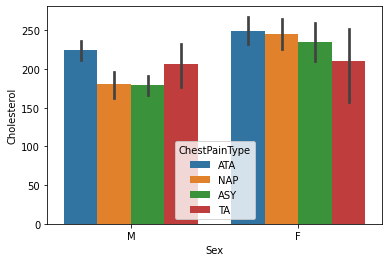

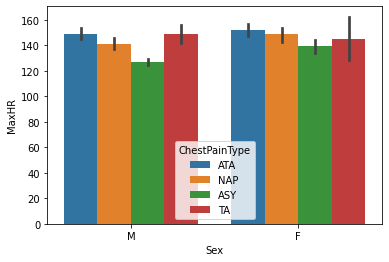

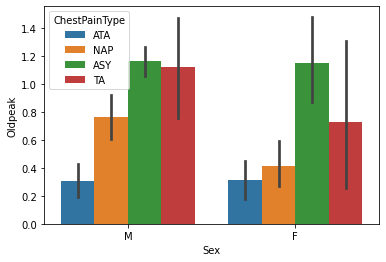

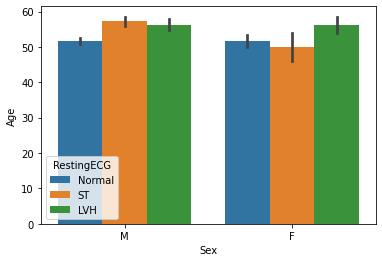

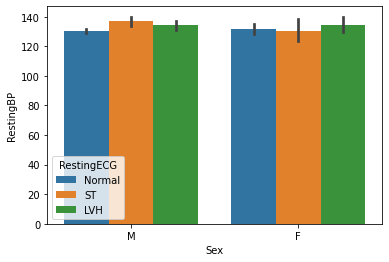

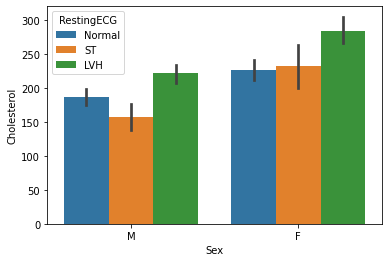

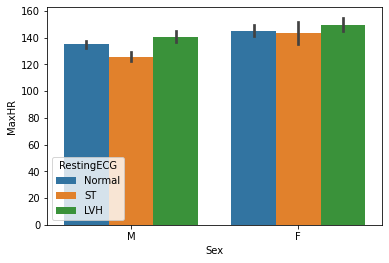

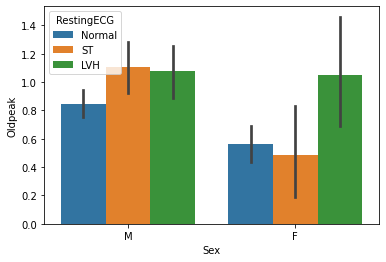

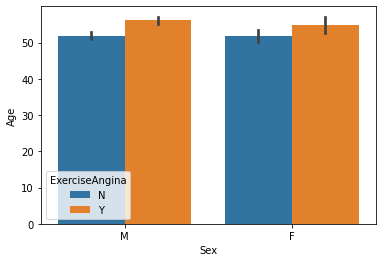

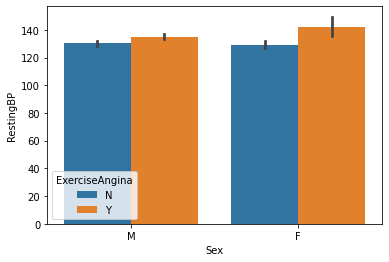

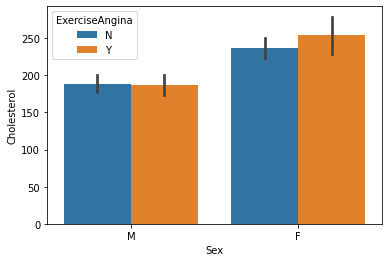

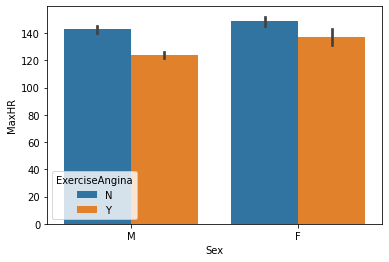

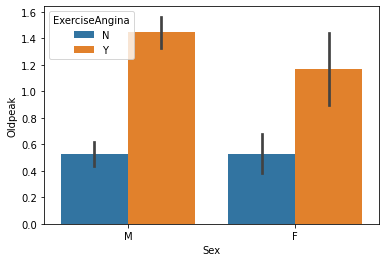

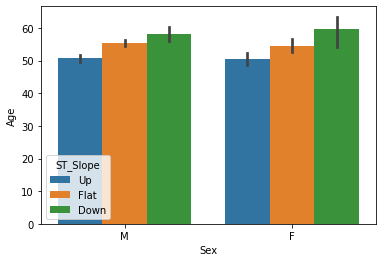

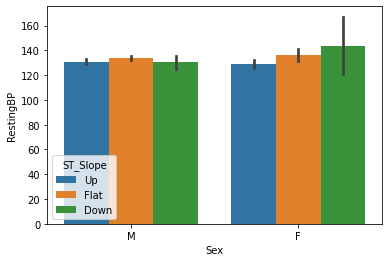

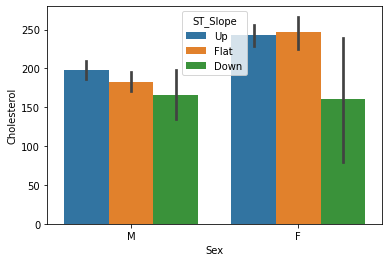

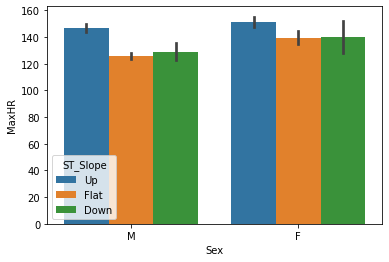

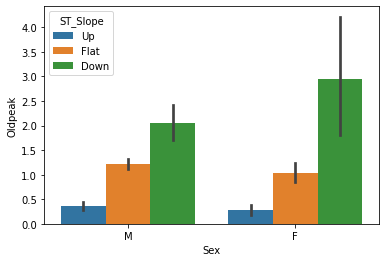

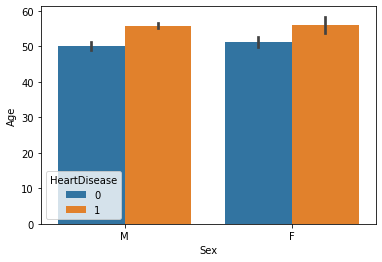

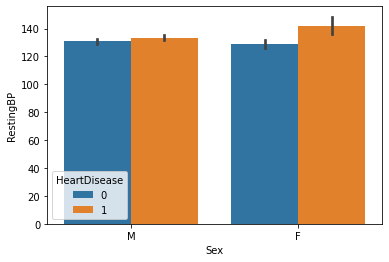

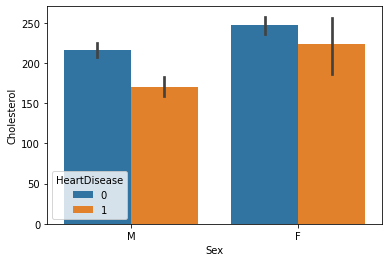

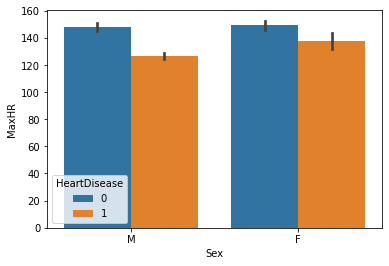

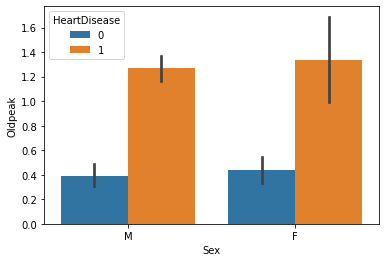

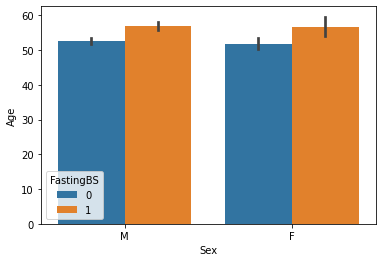

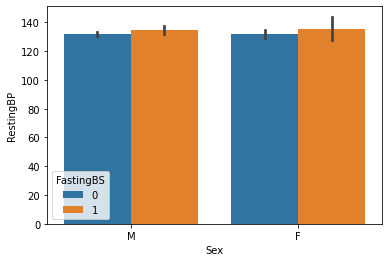

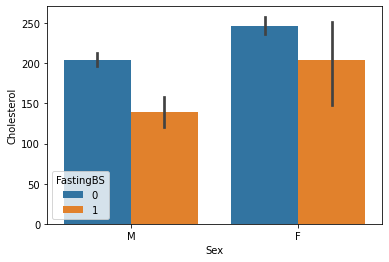

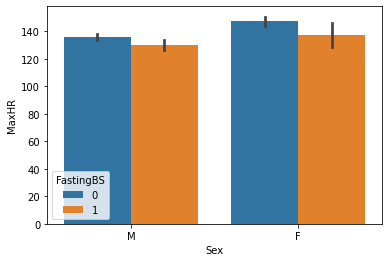

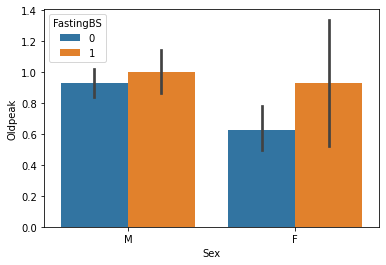

In [14]:
obj = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease','FastingBS']
num = []
for i in df.columns:
    if i not in obj:
        num.append(i)
for i in range(len(obj)):
    x='Sex'
    for j in range(len(num)):
        if obj[i] != x:
            sns.barplot(x= x,y=num[j],hue=obj[i],data=df)
            plt.show()

In [15]:
df.groupby('Sex')['HeartDisease'].mean().sort_values(ascending=False)*100

Sex
M    63.172414
F    25.906736
Name: HeartDisease, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

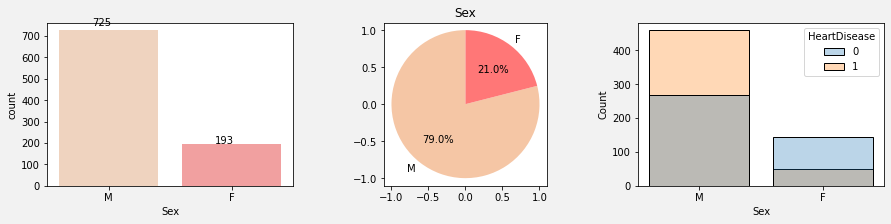

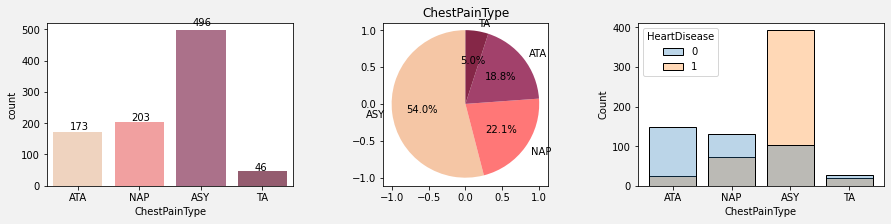

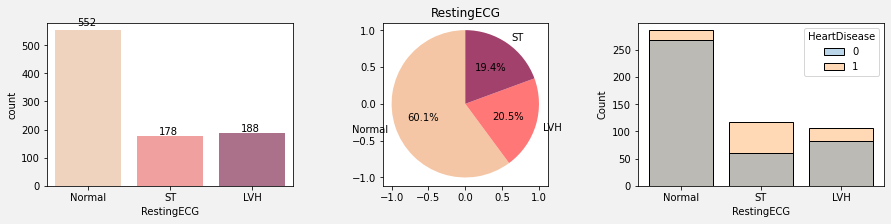

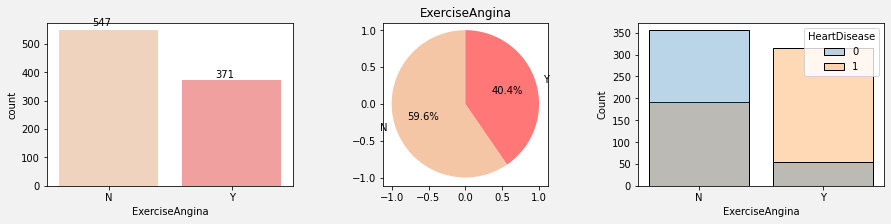

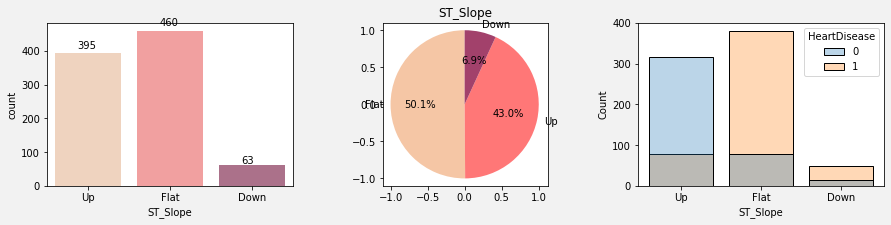

In [16]:
# Summary of categorical data
palette = ['#F5C6A5', '#FF7777', '#A2416B','#852747']

for feature in cat_cols:
    fig, ax = plt.subplots(1,3, figsize=(15,3))
    fig.patch.set_facecolor('#F2F2F2')

    sns.countplot(x=df[feature], data=df, ax=ax[0], palette=palette, alpha=0.8)
    for p, label in zip(ax[0].patches, df[feature].value_counts().index):
        ax[0].annotate(p.get_height(), (p.get_x()+p.get_width()/3, p.get_height()*1.03))
#    ax[0].spines['top'].set_visible(False)
#    ax[0].spines['right'].set_visible(False)
                    
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=ax[1], colors=palette, frame=True)
    ax[1].set_ylabel('')
    ax[1].set_title(feature)

    sns.histplot(x=feature,data=df, hue='HeartDisease',ax=ax[2], alpha=0.3, shrink=.8)  
    
plt.tight_layout

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



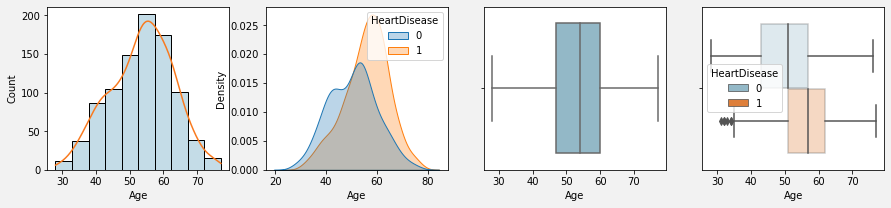

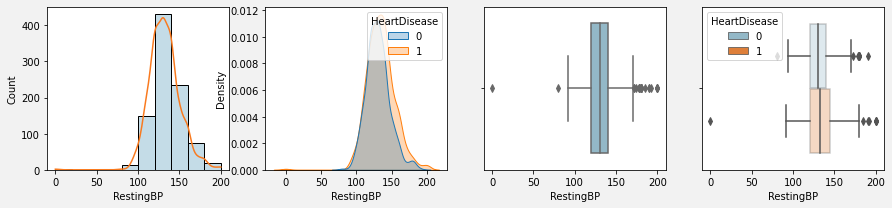

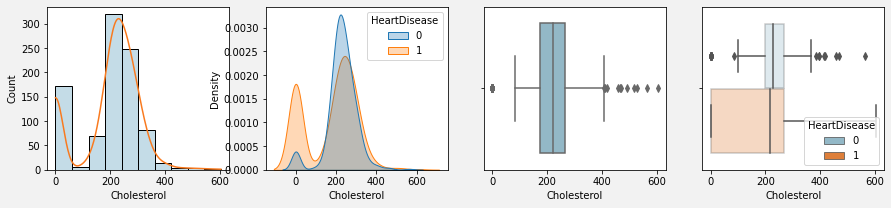

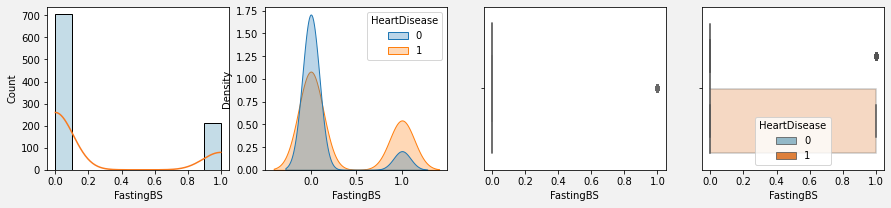

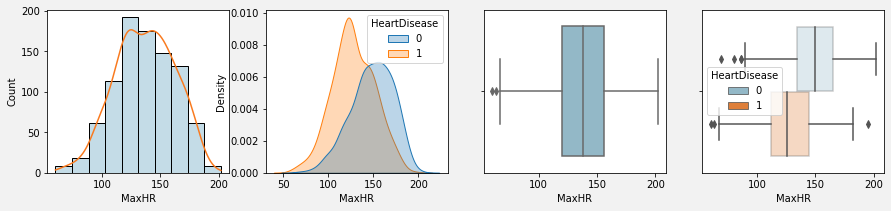

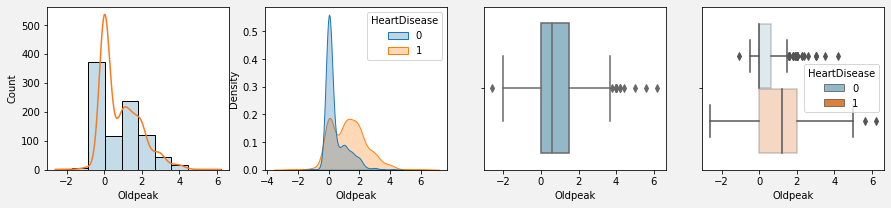

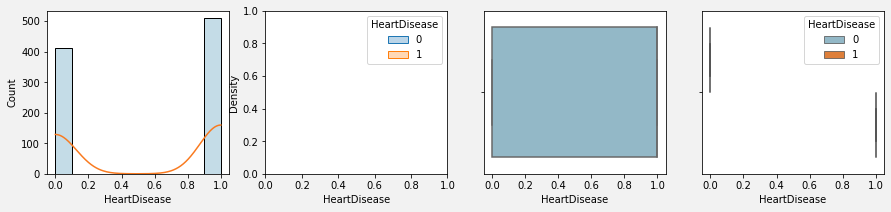

In [17]:
# Plots on numerical features to check data quality and data distribution
color ='#8abbd0'

for i in num_cols:
    fig, ax = plt.subplots(1,4, figsize=(15,3))
    fig.patch.set_facecolor( '#F2F2F2')
    sns.histplot(df[i], bins=10, ax=ax[0],  color=color, kde=True)
    ax[0].lines[0].set_color('#F97A1F')
    sns.kdeplot(x=i,data=df, hue='HeartDisease',ax=ax[1],shade=True, alpha=0.3)
    sns.boxplot(x=i, data=df,ax=ax[2], color=color)
    sns.boxplot(x=i, data=df, hue='HeartDisease',y=[""]*len(df),ax=ax[3],palette=['#8abbd0','#F97A1F'],boxprops=dict(alpha=.3))
    plt.tight_layout

In this section, we will preprocess the data before feeding data into training models.

Remove outlier from dataset
Looking at the boxplot above, we notice that RestingBP has extreme outlier at 0. This is probably wrong value, we will remove it from dataset.
Impute missing values
Cholesterol has a few zero values, we will replace them with median
Scaling features:
In the EDA section, we see that there is significant difference in order of magnitude between numerical features. Therefore, I will use StandardScaler to adjust feature sizes
Convert categorical values to numerical values:
I will use LabelEncoder to transform the data

In [18]:
# Remove outlier
row = df[df['RestingBP']==0].index
df = df.drop(df.index[row])

# Impute zero values with median
median_values = df['Cholesterol'].median()
row = df[df['Cholesterol']==0].index
df.loc[row, 'Cholesterol'] = median_values

# Adjust feature sizes
num_features = num_cols[:-1]
scaler = StandardScaler()
scaler.fit(df[num_features])

# Convert categorical values to numerical values
le = LabelEncoder()
#heart[cat_cols] = heart[cat_cols].astype('str').apply(le.fit_transform)
df[cat_cols] = df[cat_cols].apply(le.fit_transform)